In [11]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import json
import operator

In [5]:
import oauth2 as oauth

def get_oauth_client():
    consumer_key = "5iSh5VerD6uc3lqpbbVKn3A9x"   # Consumer Key (API Key)
    print(consumer_key)
    consumer_secret = "w2L3x9I06vmuzQSU6dMCC8PkdeDFFwpq1sxi9eEFHteiWUXB8F"  # Consumer Secret (API Secret)
    print(consumer_secret)
    access_token = "406103185-9ky1Cy7lOM2TBiTSZwP4LfzQD8EoXUyOA1L83Mbm"        # Access Token
    print(access_token)
    access_secret = "Oi3oqVAaQQYkOvk6zhP3DvQa6svRFWMMgxqM9i9XNfzGh"      # Access Token Secret
    print(access_secret)
    consumer = oauth.Consumer(key=consumer_key, secret=consumer_secret)
    token = oauth.Token(key=access_token, secret=access_secret)

    return oauth.Client(consumer, token)

client = get_oauth_client()

5iSh5VerD6uc3lqpbbVKn3A9x
w2L3x9I06vmuzQSU6dMCC8PkdeDFFwpq1sxi9eEFHteiWUXB8F
406103185-9ky1Cy7lOM2TBiTSZwP4LfzQD8EoXUyOA1L83Mbm
Oi3oqVAaQQYkOvk6zhP3DvQa6svRFWMMgxqM9i9XNfzGh


In [6]:
screen_name = 'PyTennessee'
url = 'https://api.twitter.com/1.1/followers/list.json?screen_name=' + screen_name
#print (client.request(url, method="GET"))
header, response = client.request(url, method="GET")
# print (header['status']) # let's check that this prints a 200

# let's save the whole response so you can take a look at it
with open('./my_followers.json', 'w') as f:
    json.dump(json.loads(response.decode('utf-8')), f, indent=2)
    
print ('status:', header['status']) # should be 200 (STATUS_OKAY)
print (response[:200]) # a lot of data!

status: 200
b'{"users":[{"id":15201743,"id_str":"15201743","name":"D3f0","screen_name":"d3f0","location":"Puerto Madryn (evtly Trelew)","description":"Teacher. Freelancer. Free software advocate. Python enthusiast,'


In [7]:
data = json.loads(response.decode('utf-8')) # convert JSON string into a dictionary object

next_cursor = data['next_cursor']
followers = [u['screen_name'] for u in data['users']]

# TODO: run this block to see what's in next_cursor and followers:
print ('next_cursor:', next_cursor)
print (len(followers), 'followers so far:', followers)

next_cursor: 1547389255773615956
20 followers so far: ['d3f0', 'PhistonOfficial', 'behnam3hajian3', 'Notre1', 'TienHanprab', 'ContentRocks', 'danwventura', 'nickCsak', 'Kevin_Najimi', 'softwarewhys', 'JWTechDev', 'DanielJIglesias', 'danrie', 'alexeul17', 'W_CoryStreet', 'jessicashinjo', 'ShawnmarieNo1', 'FrizzRecruits', 'HandBrent', 'NatSecGronk']


In [8]:
next_cursor = '1547389255773615956'
FOLLOWERS_URL = 'https://api.twitter.com/1.1/followers/list.json'
# use next_cursor to get next 20 results
url = FOLLOWERS_URL + '?screen_name=' + screen_name + '&cursor=' + str(next_cursor)
header, response = client.request(url, method='GET')

if header['status'] == '200':  # STATUS_OKAY
    
    data = json.loads(response.decode('utf-8')) # convert JSON to dictionary object

    next_cursor = data['next_cursor']
    new_followers = [u['screen_name'] for u in data['users']]
    followers.extend(new_followers)

    # save raw JSON
    with open('./my_followers.' + str(next_cursor) + '.json', 'w') as f:
        json.dump(data, f, indent=2)

    # save followers so far
    with open('./my_followers.txt', 'w') as f:
        f.write('\n'.join(followers))

    print ('next_cursor:', next_cursor)
    print (len(new_followers), 'new followers:', new_followers)

else:
    print (header, response)

next_cursor: 1545014594493791251
20 new followers: ['AndyCrookUK', 'mattbrunsdon', 'armisteadjohn', 'bdmoyer', '_andreapython', 'AvvodaaInalyea', 'surapark2495', 'Deerektor', 'KamranBhangu', 'D_Breidigan', 'GreatBigTable', 'Jacquelyn_Neal', 'ed_dodds', 'makeartnotsense', 'FlorusVN', 'wiwi_python', 'iancsmatthews', 'sahuv1', 'colorful_n0mi', 'ginapeeler']


In [9]:
f = open('./list.PyTennessee.json')

data = json.load(f)
pairs = []

for user in data['users']:
    pairs.append(('PyTennessee', str(user['screen_name'])))

pairs[:10]

[('PyTennessee', 'LampPostGroup'),
 ('PyTennessee', 'octovisinc'),
 ('PyTennessee', 'nashdevcal'),
 ('PyTennessee', 'hsvpy'),
 ('PyTennessee', 'bvalentine615'),
 ('PyTennessee', 'awebneck'),
 ('PyTennessee', 'ascot21'),
 ('PyTennessee', 'pyohio'),
 ('PyTennessee', 'CalEvans'),
 ('PyTennessee', 'nodevember')]

In [10]:
# Because the relationship data is split across files, we need to
# walk through all of them to get the data.
import os

for (dir_path, dir_names, file_names) in os.walk('./materials/data/friend_relationships/'):
    files = file_names
    
for file_name in files:
    with open('./materials/data/friend_relationships/' + file_name) as p:
        pair_data = json.load(p)
        for k in pair_data.keys():
            twitter_pair = k.split()
            if pair_data[k]['relationship']['source']['following'] is True:
                pairs.append((str(twitter_pair[0]), str(twitter_pair[1])))
            elif pair_data[k]['relationship']['source']['followed_by'] is True:
                pairs.append((str(twitter_pair[1]), str(twitter_pair[0])))
                
print(len(pairs))
print(pairs[-10:])

1286
[('kcunning', 'jacqueswoodcock'), ('jorendorff', 'raymondh'), ('alex_gaynor', 'ThePSF'), ('robertlay', 'ThePSF'), ('roguelynn', 'coop_geo'), ('ForecastWatch', 'jessicamckellar'), ('alex_gaynor', 'kcunning'), ('kcunning', 'geography76'), ('kcunning', 'mw44118'), ('jacqueswoodcock', 'jorendorff')]


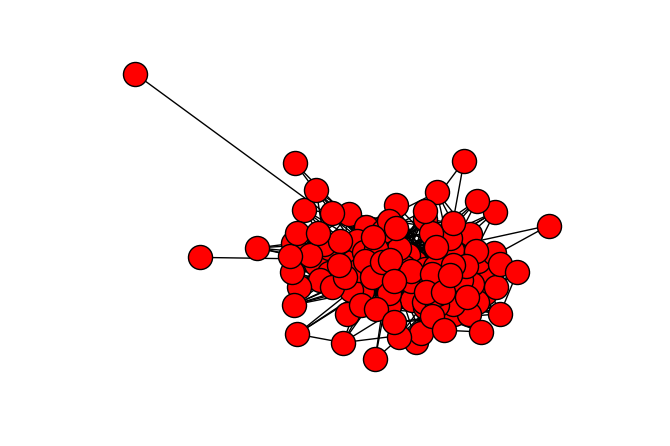

In [12]:
# Build a directed graph.
g = nx.Graph()
g.add_edges_from(pairs)
nx.draw(g)

In [20]:
# Hint: if you want to sort a dictionary to easily 
# find the highest and lowest values, use this function 
# on the output of the centrality measures like degree_centrality():

import operator

def centrality_sort(centrality_dict):
    return sorted(centrality_dict.items(), key=operator.itemgetter(1))

# ex. degree_sorted = centrality_sort(degree_vals)

In [24]:
# How connected is the network?
# Very connected!

# Centrality: which nodes have the highest/lowest degree centrality?
degree_centrality = nx.degree_centrality(g)
degree_sorted = centrality_sort(degree_centrality)
degree_sorted[-10:]


[('jessenoller', 0.3793103448275862),
 ('timoguin', 0.3793103448275862),
 ('byeliad', 0.3879310344827586),
 ('roguelynn', 0.3879310344827586),
 ('gvanrossum', 0.39655172413793105),
 ('jacqueswoodcock', 0.4051724137931034),
 ('pyohio', 0.41379310344827586),
 ('jasonamyers', 0.603448275862069),
 ('egdelwonk', 0.7672413793103449),
 ('PyTennessee', 1.0)]

In [25]:
print ('-------------Degree Centrality-------------')
print ('Highest degree:', degree_sorted[-5:])
print ('\n')
print ('Lowest degree:', degree_sorted[:5])
print ('\n')

-------------Degree Centrality-------------
Highest degree: [('jacqueswoodcock', 0.4051724137931034), ('pyohio', 0.41379310344827586), ('jasonamyers', 0.603448275862069), ('egdelwonk', 0.7672413793103449), ('PyTennessee', 1.0)]


Lowest degree: [('thefeatures', 0.008620689655172414), ('whitacre', 0.008620689655172414), ('MosaikGlobal', 0.017241379310344827), ('Spotify', 0.017241379310344827), ('NashGeekJam', 0.017241379310344827)]




In [27]:
# Centrality: which nodes have the highest/lowest betweenness centrality?
betweenness = nx.betweenness_centrality(g)
betweenness_sorted = centrality_sort(betweenness)
betweenness_sorted[-10:]

[('ForecastWatch', 0.00985558119430265),
 ('gvanrossum', 0.0115041739588007),
 ('roguelynn', 0.013783087985679413),
 ('byeliad', 0.014951131911705804),
 ('jacqueswoodcock', 0.015618198129903189),
 ('pyohio', 0.01671874304042038),
 ('timoguin', 0.017094265351580578),
 ('jasonamyers', 0.04648643703702742),
 ('egdelwonk', 0.11449112331343883),
 ('PyTennessee', 0.3205032947308686)]

In [28]:
print ('-------------Betweenness Centrality-------------')
print ('Highest betweenness:', betweenness_sorted[-5:])
print ('\n')
print ('Lowest betweenness:', betweenness_sorted[:5])
print ('\n')

-------------Betweenness Centrality-------------
Highest betweenness: [('pyohio', 0.01671874304042038), ('timoguin', 0.017094265351580578), ('jasonamyers', 0.04648643703702742), ('egdelwonk', 0.11449112331343883), ('PyTennessee', 0.3205032947308686)]


Lowest betweenness: [('thefeatures', 0.0), ('JuiceAnalytics', 0.0), ('MosaikGlobal', 0.0), ('whitacre', 0.0), ('Spotify', 0.0)]




In [29]:
# Centrality: which nodes have the highest/lowest closeness centrality?
closeness = nx.closeness_centrality(g)
closeness_sorted = centrality_sort(closeness)
closeness_sorted[-10:]

[('jessenoller', 0.6170212765957447),
 ('timoguin', 0.6170212765957447),
 ('byeliad', 0.6203208556149733),
 ('roguelynn', 0.6203208556149733),
 ('gvanrossum', 0.6236559139784946),
 ('jacqueswoodcock', 0.6270270270270271),
 ('pyohio', 0.6304347826086957),
 ('jasonamyers', 0.7160493827160493),
 ('egdelwonk', 0.8111888111888111),
 ('PyTennessee', 1.0)]

In [30]:
print ('-------------Closeness Centrality-------------')
print ('Highest closeness:', closeness_sorted[-5:])
print ('\n')
print ('Lowest closeness:', closeness_sorted[:5])

# At the end, discuss these questions more in-depth.

-------------Closeness Centrality-------------
Highest closeness: [('jacqueswoodcock', 0.6270270270270271), ('pyohio', 0.6304347826086957), ('jasonamyers', 0.7160493827160493), ('egdelwonk', 0.8111888111888111), ('PyTennessee', 1.0)]


Lowest closeness: [('thefeatures', 0.5021645021645021), ('whitacre', 0.5021645021645021), ('MosaikGlobal', 0.5043478260869565), ('Spotify', 0.5043478260869565), ('NashGeekJam', 0.5043478260869565)]


In [31]:
highest_degree = [node[0] for node in degree_sorted[-20:]]

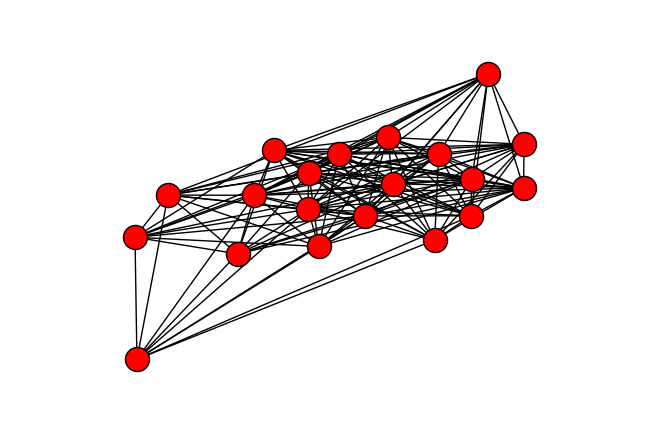

In [32]:
sub = g.subgraph(highest_degree)
nx.draw(sub)

In [47]:
# print(nx.shortest_path_length(sub, 'pyohio', 'NashGeekJam'))
sub.degree()

{'ForecastWatch': 14,
 'PyTennessee': 19,
 'R_Macy': 9,
 'ThePSF': 17,
 'alex_gaynor': 16,
 'byeliad': 12,
 'catherinedevlin': 17,
 'coop_geo': 13,
 'diana_clarke': 16,
 'egdelwonk': 17,
 'gvanrossum': 14,
 'jacqueswoodcock': 11,
 'jasonamyers': 19,
 'jessenoller': 16,
 'kcunning': 18,
 'kevinharvey': 13,
 'pycon': 16,
 'pyohio': 14,
 'roguelynn': 16,
 'timoguin': 11}

1.331578947368421


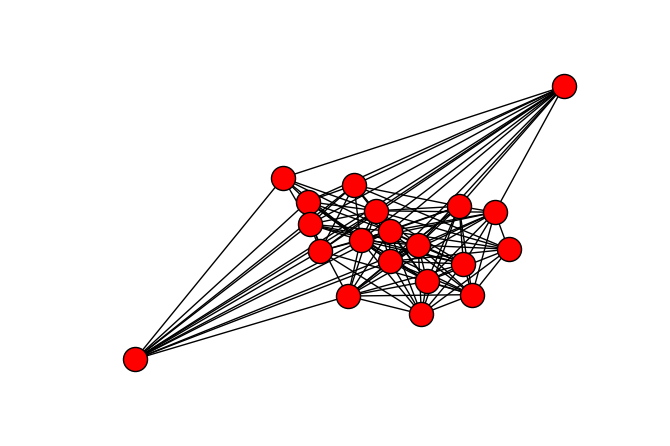

In [53]:
highest_bet = [node[0] for node in betweenness_sorted[-20:]]
sub2 = g.subgraph(highest_bet)
nx.draw(sub2)
sub2.degree()
print(nx.average_shortest_path_length(sub2))

1.2157894736842105


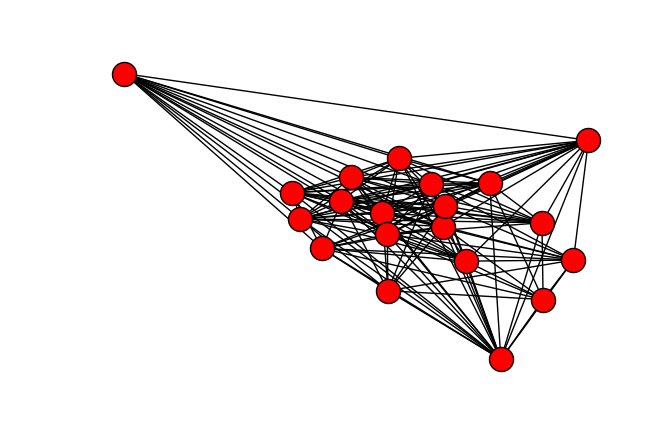

In [54]:
highest_close = [node[0] for node in closeness_sorted[-20:]]
sub3 = g.subgraph(highest_close)
nx.draw(sub3)
sub3.degree()
print(nx.average_shortest_path_length(sub3))

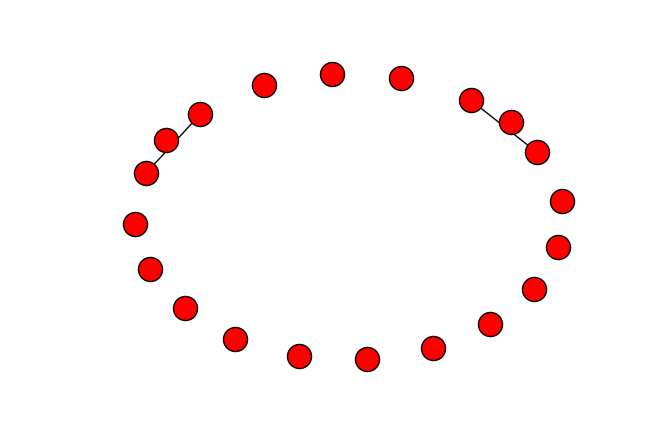

In [33]:
lowest_degree = [node[0] for node in degree_sorted[:20]]
subl = g.subgraph(lowest_degree)
nx.draw(subl)

In [52]:
# print(nx.shortest_path_length(sub, 'thefeatures', 'R_Macy'))
subl.degree()

{'GitHubCommunity': 1,
 'InformIT': 0,
 'JuiceAnalytics': 0,
 'LampPostGroup': 0,
 'MosaikGlobal': 0,
 'NashGeekJam': 0,
 'Spotify': 0,
 'SurveyMonkey': 0,
 'adafruit': 0,
 'adamfblahblah': 0,
 'jetbrains': 1,
 'mozilla': 0,
 'pragprog': 0,
 'pycharm': 1,
 'pyrsonwho': 0,
 'rubybuddha': 1,
 'studionow': 0,
 'thefeatures': 0,
 'toranb': 0,
 'whitacre': 0}

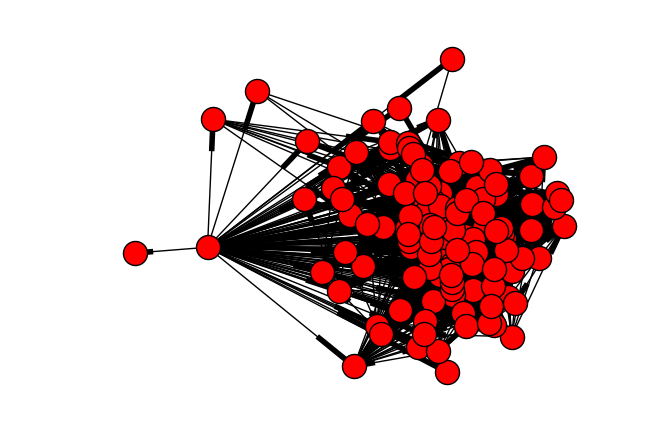

In [34]:
# Directed graph

d = nx.DiGraph()

d.add_edges_from(pairs)
nx.draw(d)

In [37]:
in_degree_centrality = nx.in_degree_centrality(d)
in_degree_sorted = sorted(in_degree_centrality.items(), key=operator.itemgetter(1))
print ('-------------Degree Centrality-------------')
print ('Highest in degree:', in_degree_sorted[-5:])
print ('\n')
print ('Lowest in degree:', in_degree_sorted[:5])
print ('\n')

-------------Degree Centrality-------------
Highest in degree: [('ThePSF', 0.3103448275862069), ('egdelwonk', 0.3189655172413793), ('gvanrossum', 0.33620689655172414), ('pycon', 0.33620689655172414), ('jasonamyers', 0.46551724137931033)]


Lowest in degree: [('PyTennessee', 0.0), ('InformIT', 0.008620689655172414), ('thefeatures', 0.008620689655172414), ('robertlay', 0.008620689655172414), ('octovisinc', 0.008620689655172414)]




In [38]:
out_degree_centrality = nx.out_degree_centrality(d)
out_degree_sorted = sorted(out_degree_centrality.items(), key=operator.itemgetter(1))
print ('-------------Degree Centrality-------------')
print ('Highest out degree:', out_degree_sorted[-5:])
print ('\n')
print ('Lowest out degree:', out_degree_sorted[:5])

-------------Degree Centrality-------------
Highest out degree: [('kevinharvey', 0.27586206896551724), ('timoguin', 0.3620689655172414), ('pyohio', 0.3793103448275862), ('egdelwonk', 0.4482758620689655), ('PyTennessee', 1.0)]


Lowest out degree: [('planetpython', 0.0), ('thefeatures', 0.0), ('pycoders', 0.0), ('whit537', 0.0), ('pynash', 0.0)]


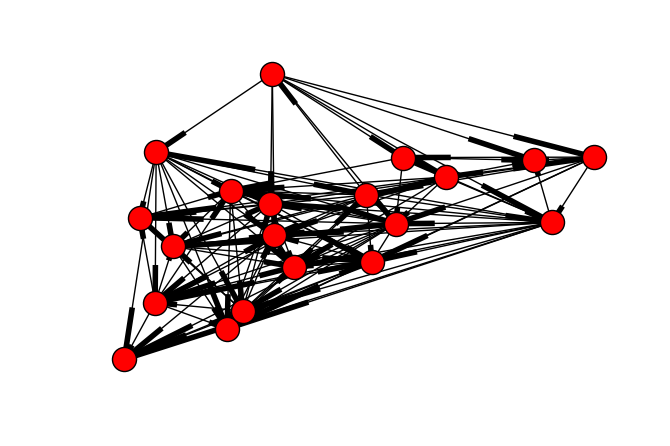

In [39]:
highest_in_degree = [node[0] for node in in_degree_sorted[-20:]]
subin = d.subgraph(highest_in_degree)
nx.draw(subin)

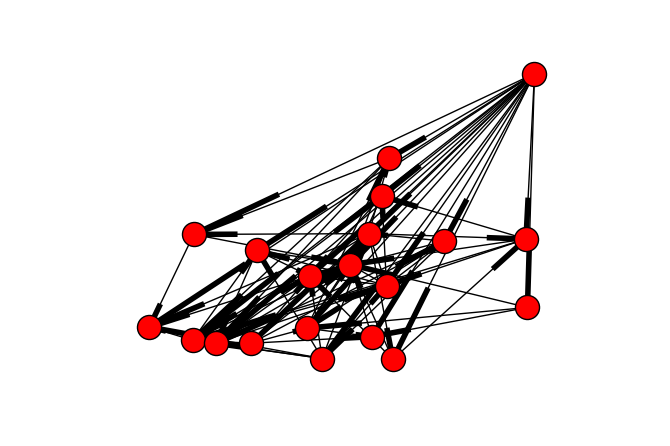

In [40]:
highest_out_degree = [node[0] for node in out_degree_sorted[-20:]]
subin = d.subgraph(highest_out_degree)
nx.draw(subin)

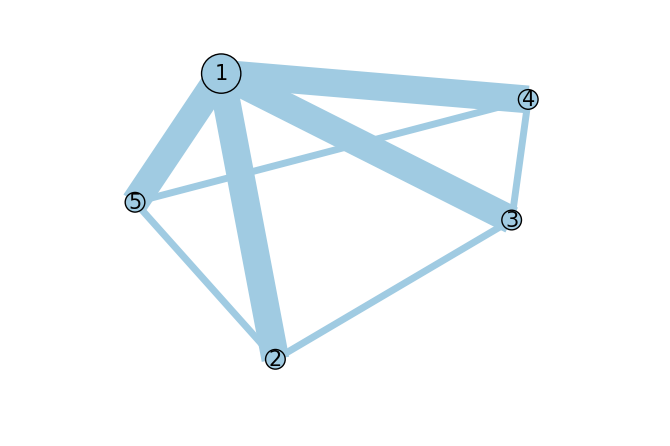

In [55]:
import networkx as nx

# we need this 'magic' command to draw graphs inline
%matplotlib inline  

g = nx.Graph()

# let's attach a size attribute to each node to describe how big we want the node to be
g.add_node(1, {'size': 800})
g.add_node(2, {'size': 200})
g.add_node(3, {'size': 200})
g.add_node(4, {'size': 200})
g.add_node(5, {'size': 200})

g.add_edge(1,2, { 'thickness': 20})
g.add_edge(1,3, { 'thickness': 20})
g.add_edge(1,4, { 'thickness': 20})
g.add_edge(1,5, { 'thickness': 20})
g.add_edge(2,3, { 'thickness': 5})
g.add_edge(3,4, { 'thickness': 5})
g.add_edge(4,5, { 'thickness': 5})
g.add_edge(5,2, { 'thickness': 5})

# let's iterate through the nodes and edges and extract the list of node & edge sizes
node_size = [attribs['size'] for (node, attribs) in g.nodes(data=True)]
edge_thickness = [attribs['thickness'] for (v_from, v_to, attribs) in g.edges(data=True)]

LIGHT_BLUE = '#A0CBE2'

nx.draw(g, 
    node_size = node_size,   # node_size can either take a single value (where all nodes will be size N),
                             # or a list of values, where Nth list value will be the size for the Nth node
    width = edge_thickness,  # similarly, the Nth value corresponds to the width for edge N
    node_color = LIGHT_BLUE,
    edge_color = LIGHT_BLUE,
    font_size = 15,
    with_labels = True
)

In [57]:
import networkx as nx
import matplotlib.pyplot as plt

edgelist_txt = './materials/data/retweets.txt'
G = nx.read_edgelist(edgelist_txt, create_using=nx.DiGraph())

['PyTennessee']


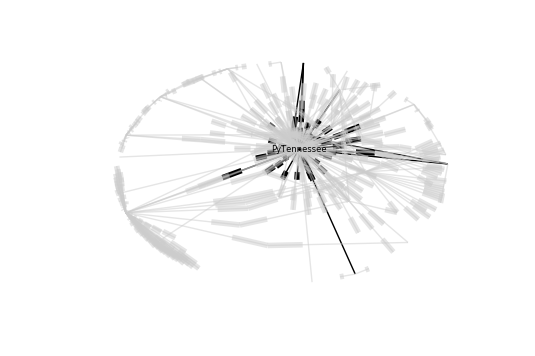

In [59]:
LAYOUTS = {
    'circular': nx.circular_layout,
    'fr': nx.fruchterman_reingold_layout,
    'random': nx.random_layout,
    'shell': nx.shell_layout,
    'spectral': nx.spectral_layout,
    'spring': nx.spring_layout
}

def save_layout(G, layout_name):
    elarge=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] >1.5]
    esmall=[(u,v) for (u,v,d) in G.edges(data=True) if d['weight'] <=1.5]
    nlarge=[n for n in G.nodes() if n in ['PyTennessee']]
    pos=LAYOUTS[layout_name](G) # positions for all nodes

    print (nlarge)
    # nodes
    nx.draw_networkx_nodes(G,pos,nodelist=nlarge,node_size=1)

    # edges
    nx.draw_networkx_edges(G,pos,edgelist=elarge, width=1)
    nx.draw_networkx_edges(G,pos,edgelist=esmall, width=1,alpha=0.5,edge_color='#cccccc')

    # labelsM
    labels={}
    labels['PyTennessee']='PyTennessee'
    nx.draw_networkx_labels(G,pos,labels,font_size=6)
    #nx.draw_networkx_labels(G,pos,nodelist=nlarge,font_size=6,font_family='sans-serif')

    plt.axis('off')
    plt.savefig(layout_name + '.png', dpi=500)

save_layout(G, 'spring')